In [102]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# necessary packages
import numpy as np
import pandas as pd

# build and train a model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

# evaluate the model
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import statsmodels.api as sm 

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Preparing the Data

In [7]:
# summary of our data
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# check the missing values
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

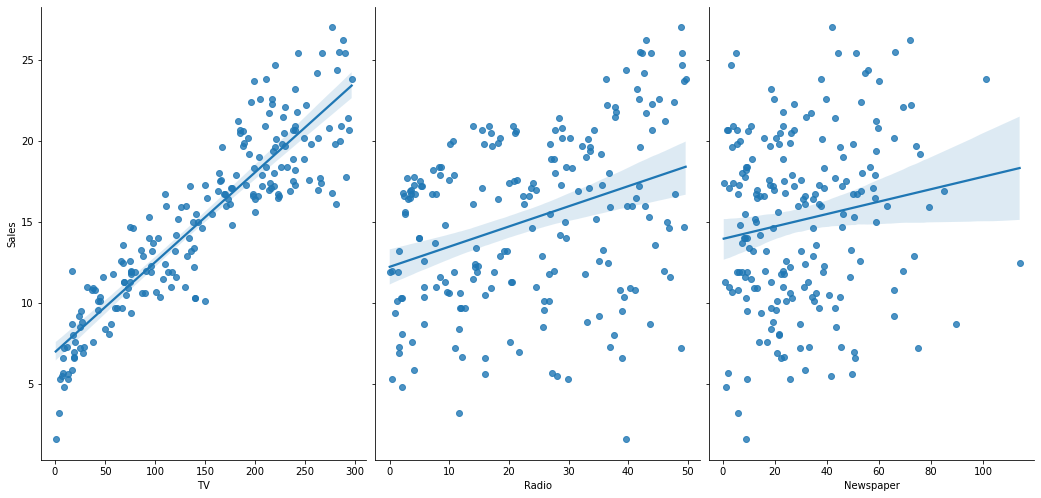

In [123]:
# Sales relation with other variables
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')
plt.show()

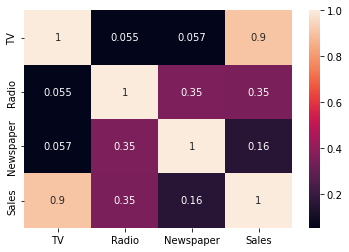

In [13]:
# correlation between different variables.
sns.heatmap(data.corr(), annot = True)
plt.show()

As is visible from the plot the variable TV seems to be most correlated with Sales with the value of 0.9. 
So let's go ahead and perform simple linear regression using TV as our feature variable.

## Training the Model

In [104]:
### STATSMODELS ###
# create a fitted model
linearModel1 = smf.ols(formula='Sales ~ TV', data=data).fit()
linearModel1.params

Intercept    6.974821
TV           0.055465
dtype: float64

In [114]:
### SCIKIT-LEARN ###
X = np.array(data['TV'])
y = np.array(data['Sales'])

# fit the model
linearModel2 = LinearRegression()
linearModel2.fit(X.reshape(-1, 1), y)

print(linearModel2.intercept_)
print(linearModel2.coef_)

6.9748214882298925
[0.05546477]


## Interpreting Model Coefficients
#### Interpreting the TV coefficient ( β1 )

* A "unit" increase in TV ad spending is associated with a 0.05546477 "unit" increase in Sales
* Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 55.46477 widgets
* Note here that the coefficients represent associations, not causations

Let's say that there was a new market where the TV advertising spend was $50,000. <br>
**What would we predict for the Sales in that market?**

*y=β0+β1x*
<br>
y=6.97482149+0.05546477×50

We would use 50 instead of 50,000 because the original data consists of examples that are divided by 1000

In [118]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

print('Manual Prediction', 7.032594 + 0.047537*50)
print('StatsModels Prediction', linearModel1.predict(X_new))
print('Scikit-learn Prediction', linearModel2.predict([[50]]))

Manual Prediction 9.409444
StatsModels Prediction 0    9.74806
dtype: float64
Scikit-learn Prediction [9.74806001]


Thus, we would predict Sales of 9,748 widgets in that market.

## Evaluating the Model
Computing MAE and RMSE metrics

In [124]:
### STATSMODELS ###
linearModel1.rsquared

0.8121757029987414

In [126]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
linearModel2.score(X.reshape(-1, 1), y)

0.8121757029987414

Overall we can interpret that 81% of the model predictions are correct and the variation in the errors is around 2 units. <br>
For an ideal model R2 score = 1, which is almost impossible o achieve.